# Plotting code for summary of ICON-ModEx iterations
Note that the results of the Cross Validation (CV) are suspect - there is a *repeating pattern* in some of the results in a process that should be entirely random.

1. I am reporting the `cv_std` of the cross-validation (CV) iterations b/c that's the only measure we have for each individual iteration of the historical ModEx iterations, despite its possible flaws.
2. Some of the `cv_avg` (average over the scores of 5 CV iterations of the same model) and `hold-out` (the score of a single model, the "offical" model of that iteration) differ by considerable amounts.  Therefore, I select the maximum value to plot because they are each different estimates for the accuracy of the model.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
icon_modex_summary = pd.read_csv('ICON_ModEX_summary.csv')

In [3]:
icon_modex_summary

,Job_ID,hold-out,cv_avg,cv_std
0,58356,0.016,0.121,0.080
1,60166,-0.591,0.072,0.112
2,60207,0.118,0.036,0.097
3,60301,0.196,0.016,0.172
4,60357,0.250,-0.059,0.253
5,60466,0.271,-0.084,0.224


In [4]:
# Compare this column with the full data frame, above.
icon_modex_summary[['hold-out','cv_avg']].max(axis=1)

0    0.121
1    0.072
2    0.118
3    0.196
4    0.250
5    0.271
dtype: float64

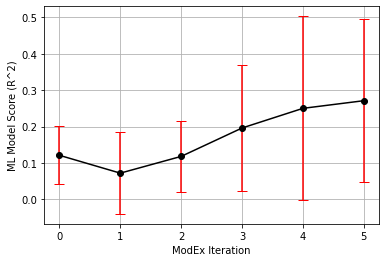

In [5]:
fig, ax = plt.subplots()
plt.errorbar(
    icon_modex_summary.index,
    icon_modex_summary[['hold-out','cv_avg']].max(axis=1),
    yerr=icon_modex_summary['cv_std'],
    fmt='ko-',
    ecolor='r',
    capsize=5)
ax.grid()
plt.ylabel('ML Model Score (R^2)')
plt.xlabel('ModEx Iteration')
plt.savefig('ICON_ModEx_summary.pdf')